In [1]:
import h5py
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import json

In [2]:
h5file = h5py.File('/tmp/record-0008.h5', 'r')

photo = h5file['photo']['messages']
stim = h5file['stim']['messages']

In [3]:
np.mean(np.diff(photo['created'].astype('int64'))/1e6) / (1000/60)

3.058189317757009

In [4]:
select_show_true = np.vectorize(lambda x: json.loads(x).get('show', False) == True)
stim = stim[select_show_true(stim['message'])]

photo = photo[photo['message']!='Dark\r\n']

stim_ts = stim['created'].astype('int64')
photo_ts = photo['created'].astype('int64')

In [5]:
def closest_bigger(stim_ts, photo_ts):
    res = []

    for i in stim_ts:
        d = (photo_ts-i)/1e6
        d = d[d>0]
        if len(d)>0:
            m = np.min(d)
            if m<200:
                res.append(m)
    return res


In [8]:
res = closest_bigger(photo_ts, stim_ts) #photo_ts)
np.mean(res) / (1, 16)

array([38.61875943,  2.41367246])

In [13]:
(photo_ts - stim_ts[4])/1e6

(photo_ts[4]-photo_ts[3])/1e6 /16

6.18135625

In [30]:
stats.describe( diff)


DescribeResult(nobs=496, minmax=(0.0019317, 2.0203828), mean=0.7722757173387096, variance=0.03537087675076337, skewness=4.531747181846795, kurtosis=29.0425682163975)

In [5]:
#(np.min(diff), np.max(diff))

len(signal_raw)

33098

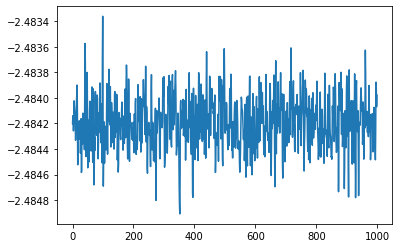

In [9]:
x = 20615
peak = signal_raw[x-500:x+500]
plt.plot(peak)

In [56]:
cs = np.cumsum(signal_blocks['samples'])
blockId = np.argmax(cs>x)

block_ts = signal_blocks['created', blockId]
block_last_sample = cs[blockId]

In [68]:
ts = block_ts - (block_last_sample - x)*(1e9/1000)
np.argmin(np.abs(ts - msg_raw['created']))

13

In [57]:
photo[()]

array([(1597087035105188416, 1597087035105847849, 'Bright\r\nDark\r\nBright\r\nDark\r\nBrig'),
       (1597087035112348859, 1597087035112847330, 'ht\r\nDark\r\nBright\r\nDark\r\n'),
       (1597087037588387463, 1597087037588621185, 'Bright\r\nDark\r\nBright\r\nDark\r\nBrig'),
       (1597087037595528545, 1597087037595689976, 'ht\r\nDark\r\nBright\r\nDark\r\n'),
       (1597087043988134022, 1597087043988370180, 'Bright\r\nDark\r\nBright\r\nDark\r\nBrig'),
       (1597087043992841828, 1597087043993020770, 'ht\r\nDark\r\nBright\r\n'),
       (1597087043996277777, 1597087043996422023, 'Dark\r\n'),
       (1597087046721415706, 1597087046721613756, 'Bright\r\nDark\r\nBright\r\nDark\r\nBrig'),
       (1597087046726518509, 1597087046726701308, 'ht\r\nDark\r\nBright\r\n'),
       (1597087046729168772, 1597087046729298826, 'Dark\r\n'),
       (1597087052287934871, 1597087052288173072, 'Bright\r\nDark\r\nBright\r\nDark\r\nBrig'),
       (1597087052292654658, 1597087052292795623, 'ht\r\nDark\r\nBr

In [47]:
h5file = h5py.File('//tmp/record-0012.hdf', 'r')

photo = h5file['photo']['messages']

photo = photo[photo['message']!='Dark\r\n']

p_times = photo['created'].astype('int64')


In [48]:
c_times = np.asarray([
1598044764867288831 ,
1598044765600633376 ,
1598044766600619503 ,
1598044767533948718 ,
1598044768467257201 ,
1598044769533789249 ,
1598044770533841150 ,
1598044771600490810 ,
1598044772800529565 ,
1598044773867275350 ,
1598044775000466107 ,
1598044776067240110 ,
1598044777133712587 ,
1598044778133721576 ,
1598044779200405484 ,
1598044780067164350 ,
1598044781067119786 ,
1598044782067139313 ,
1598044783133662088 ,
1598044784067079257 ,

])

photo[()]

array([(1598044764865235423, 1598044764865820185, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044765598578152, 1598044765599112251, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044766598600519, 1598044766599201420, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044767532011749, 1598044767532558656, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044768465103973, 1598044768465732269, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044769531661320, 1598044769532153855, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044770548410297, 1598044770549074614, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044771614991224, 1598044771615704405, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044772798404787, 1598044772798885443, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044773865028468, 1598044773865720240, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044774998483026, 1598044774998914994, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044776064764701, 1598044776065358053, 'Bright\r\nDark\r\nBright\r\n'),
    

In [53]:
d = np.asarray(closest_bigger(c_times, p_times))
(d, d/16)

(array([2.053408, 2.055224, 2.018984, 1.936969, 2.153228, 2.127929,
        2.124778, 2.246882, 1.983081, 2.475409, 2.002965, 2.052503,
        2.073848, 2.320087, 2.242799, 2.256212, 2.248838, 2.174491]),
 array([0.128338  , 0.1284515 , 0.1261865 , 0.12106056, 0.13457675,
        0.13299556, 0.13279863, 0.14043012, 0.12394256, 0.15471306,
        0.12518531, 0.12828144, 0.1296155 , 0.14500544, 0.14017494,
        0.14101325, 0.14055238, 0.13590569]))

In [50]:
photo[()]

array([(1598044764865235423, 1598044764865820185, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044765598578152, 1598044765599112251, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044766598600519, 1598044766599201420, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044767532011749, 1598044767532558656, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044768465103973, 1598044768465732269, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044769531661320, 1598044769532153855, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044770548410297, 1598044770549074614, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044771614991224, 1598044771615704405, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044772798404787, 1598044772798885443, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044773865028468, 1598044773865720240, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044774998483026, 1598044774998914994, 'Bright\r\nDark\r\nBright\r\n'),
       (1598044776064764701, 1598044776065358053, 'Bright\r\nDark\r\nBright\r\n'),
    

In [51]:
(c_times-p_times)/1e6

array([  2.053408,   2.055224,   2.018984,   1.936969,   2.153228,
         2.127929, -14.569147, -14.500414,   2.124778,   2.246882,
         1.983081,   2.475409,   2.002965,   2.052503,   2.073848,
         2.320087,   2.242799,   2.256212,   2.248838,   2.174491])

In [52]:
(p_times - c_times[5])/1e6

array([-4.66855383e+03, -3.93521110e+03, -2.93518873e+03, -2.00177750e+03,
       -1.06868528e+03, -2.12792900e+00,  1.01462105e+03,  2.08120197e+03,
        3.26461554e+03,  4.33123922e+03,  5.46469378e+03,  6.53097545e+03,
        7.59792037e+03,  8.59787982e+03,  9.66454239e+03,  1.05310550e+04,
        1.15310877e+04,  1.25310939e+04,  1.35976240e+04,  1.45311155e+04])